# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Aprilia Wulandari
- **Email:** apriliawulandari@mail.ugm.ac.id
- **ID Dicoding:** @ariliaw

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan ulasan pelanggan berdasarkan kategori produk?
- Berapa rata-rata waktu pengiriman hingga sampai ke pelanggan?
- Siapa pelanggan yang paling aktif dalam memberikan nilai?

## Import Semua Packages/Library yang Digunakan

In [3]:
# import semua library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
# memuat tabel customers_dataset

customers_df = pd.read_csv('https://raw.githubusercontent.com/ariliawulan/data_penjualan/refs/heads/main/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
# memuat tabel orders_dataset

orders_df = pd.read_csv('https://raw.githubusercontent.com/ariliawulan/data_penjualan/refs/heads/main/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
# memuat tabel order_payments_dataset

order_payments = pd.read_csv('https://raw.githubusercontent.com/ariliawulan/data_penjualan/refs/heads/main/order_payments_dataset.csv')
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
# memuat tabel product_dataset

product_df = pd.read_csv('https://raw.githubusercontent.com/ariliawulan/data_penjualan/refs/heads/main/products_dataset.csv')
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [8]:
# memuat tabel product_category_name_translation

product_name_translation = pd.read_csv('https://raw.githubusercontent.com/ariliawulan/data_penjualan/refs/heads/main/product_category_name_translation.csv')
product_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
# memuat tabel order_reviews_dataset

order_reviews_df = pd.read_csv('https://raw.githubusercontent.com/ariliawulan/data_penjualan/refs/heads/main/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [10]:
# memuat tabel order_items

order_items = pd.read_csv('https://raw.githubusercontent.com/ariliawulan/data_penjualan/refs/heads/main/order_items_dataset.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Insight:**
Terdapat 7 tabel yang digunakan yakni:
- customers_dataset
- orders_dataset
- order_payments_dataset
- product_dataset
- product_category_name_translation
- order_reviews_dataset
- order_items_dataset

Ke-7 tabel di atas akan digunakan untuk menjawab 3 pertanyaan bisnis yang telah disebutkan sebelumnya.



### Assessing Data



> ASSESSING CUSTOMER_DF



In [11]:
# assessing data customer_df

customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Berdasarkan hasil tersebut, dapat disimpulkan bahwa tidak terdapat masalah pada tipe data tiap kolom dalam df_customer. Selain itu, jumlah datanya juga telah lengkap sehingga tidak ada missing value di dalamnya.

In [12]:
# memeriksa duplikasi data dan ringkasan parameter statistik

print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Berdasarkan hasil yang dilihat tidak terdapat duplikasi yang terdeteksi pada customers_df.



> ASSESSING ORDERS_DF



In [13]:
# assessing data orders_df

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Berdasarkan hasil di atas terdapat beberapa masalah yang terdeteksi yaitu terdapat kesalahan tipe data pada kolom:
- order_purchase_timestamp
- order_approved_at
- order_delivered_carrier_date
- order_delivered_customer_date
- order_estimated_delivery_date

Lalu juga terdapat missing values pada kolom:
- order_approved_at
- order_delivered_carrier_date
- order_delivered_customer_date

In [14]:
# memeriksa jumlah missing value

orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


Berdasarkan hasil data di atas, dapat disimpulkan bahwa terdapat missing value pada sebanyak 160 pada order_approved_at, 1783 pada kolom order_delivered_carrier_date, dan 2965 kolom order_delivered_customer_date. Hal ini akan dibersihkan pada tahap cleaning data.

In [15]:
# memeriksa duplikasi data dan ringkasan parameter statistik

print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Hasil di atas menunjukkan bahwa tidak ada duplikasi pada data df_order.



> ASSESSING DATA ORDER_PAYMENTS


In [16]:
# assessing data order_payments

order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Beradasarkan hasil tersebut, dapat disimpulkan bahwa tidak terdapat masalah pada tabel order_payments. Selain itu, jumlah datanya juga telah lengkap, sehingga tidak ada missing value di dalamnya.

In [17]:
# memeriksa duplikasi data dan ringkasan parameter statistik

print("Jumlah duplikasi: ", order_payments.duplicated().sum())
order_payments.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Berdasarkan hasil tersebut, dapat disimpulkan bahwa tidak terdapat masalah duplikasi maupun invalid data pada kolomnya.



> ASSESSING DATA PRODUCT_DF



In [18]:
# assessing data product_df

product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Pada assesing data df_produk menunjukkan adanya missing values pada kolom sebagai berikut:
- product_category_name
- product_name_lenght
- product_description_lenght
- product_photos_qty
- product_weight_g
- product_length_cm
- product_height_cm
- product_width_cm

In [19]:
# memeriksa informasi terkait jumlah missing values

product_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


Pada hasil yang ditampilkan terdapat sejumlah missing values pada setiap kolom yang telah disebut sebelumnya dengan rincian sebagai berikut:
Missing values dengan total 610:
- product_category_name
- product_name_lenght
- product_description_lenght
- product_photos_qty

Missing values dengan data total 2:
- product_weight_g
- product_length_cm
- product_height_cm
- product_width_cm

In [20]:
# memeriksa duplikasi data dan ringkasan parameter statistik

print("Jumlah duplikasi: ", product_df.duplicated().sum())
product_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Tidak ada data duplikasi, namun terdapat keanehan pada nilai minimum yang bernilai 0 dan nilai maksimum yang melebihi total produk yang terdapat pada kolom product_weight_g. Ini kemungkinan besar yang terjadi karena adanya innaccurate value pada kolom tersebut.



> ASSESSING DATA PRODUCT_NAME_TRANSLATION


In [21]:
# assessing data product_name_trsnlation

product_name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Berdasarkan assessing data yang dilakukan tidak terdapat keanehan pada kolom yang terdapat pada tabel product_name_translation.



>  ASSESSING DATA ORDER_REVIEWS_DF



In [22]:
# assessing data order_reviews_dataset

order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Berdasarkan assessing data pada tabel order_reviews_df terdapat dua kolom yang mengandung missing values yakni:
-  review_comment_title
- review_comment_message

Selain missing value terdapat tipe data pada kolom yang tidak sesuai dengan nilainya yakni:
- review_creation_date
- review_answer_timestamp

In [23]:
# memeriksa informasi terkait jumlah missing values

order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


Pada hasil yang ditampilkan terdapat sejumlah missing values pada setiap kolom yang telah disebut sebelumnya dengan rincian sebagai berikut:
- review_comment_title    87656
- review_comment_message	58247

Jumlah missing value yang terdeteksi tergolong cukup besar jumlahnya

In [24]:
# memeriksa duplikasi data dan ringkasan parameter statistik

print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())
order_reviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000




> ASSESSING DATA ORDER_ITEMS



In [25]:
# assessing data order_items

order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Jumlah data pada order_items lengkap atau dengan kata lain tidak ada missing value di dalamnya. Akan tetapi, terdapat kesalahan tipe data untuk kolom shipping_limit_date. Kolom tersebut harusnya direpresentasikan sebagai tipe datetime bukan object (ini digunakan untuk tipe data strting)

In [26]:
# memeriksa duplikasi data dan ringkasan parameter statistik

print("Jumlah duplikasi: ", order_items.duplicated().sum())
order_items.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
Berikut merupakan identifikasi assessing dari ke-6 tabel:
1. customers_df:
Tidak terdapat masalah duplikasi maupun invalid data

2. orders_df:
Terdapat invalid atau kesalahan tipe data pada 7 kolom dan Terdapat missing value pada beberapa 3 kolom

3. order_payments:
Tidak terdapat masalah duplikasi maupun invalid data

4. product_df:
Terdapat missing values pada 8 kolom dan Terdapat innacurate data pada parameter statistic min() dan max

5. product_name_translation:
Tidak terdapat masalah duplikasi maupun invalid data

6. order_reviews_df:
Terdapat missing value pada 2 kolom dan Terdapat invalid atau kesalahan tipe data pada 2 kolom

7. order_items:
Terdapat invalid atau kesalahan tipe data pada 1 kolom

### Cleaning Data



> CLEANING DATA ORDERS_DF



**MENANGANI INVALID VALUE ATAU KESALAHAN TIPE DATA**

In [27]:
# mengganti tipe data pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date menjadi datetime
# proses ini dilakukan dengan menggunakan function to_datetime()

datetime_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [28]:
# cek kode secara keseluruhan

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**MENANGANI MISSING VALUE**

In [29]:
# memuat missing value order_approved_at
# menampilkan baris data yang mengandung missing value pada kolom order_approved_at

orders_df[orders_df['order_approved_at'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


Berdasarkan gambar di atas, dapat dilihat bahwa baris data masih mengandung banyak informasi penting sehingga sayang jika langsung dibuang. Oleh karena itu, kita akan menggunakan metode imputation dengan median dari data.

In [30]:
# menghitung median dari order_approved_at
median_order_approved_at = orders_df['order_approved_at'].median()

# mengisi missing value dengan median
orders_df['order_approved_at'].fillna(median_order_approved_at, inplace=True)

<ipython-input-30-daee1a0609f0>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_df['order_approved_at'].fillna(median_order_approved_at, inplace=True)


In [31]:
# memuat missing value order_delivered_carrier_date
# menampilkan baris data yang mengandung missing value pada kolom order_delivered_carrier_date

orders_df[orders_df['order_delivered_carrier_date'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2018-01-19 11:36:13,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2018-01-19 11:36:13,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


Berdasarkan gambar di atas, dapat dilihat bahwa baris data masih mengandung banyak informasi penting sehingga sayang jika langsung dibuang. Oleh karena itu, kita akan menggunakan metode imputation dengan mengisikan median dari data.

In [32]:
# menghitung median dari order_delivered_carrier_date
median_delivered_date = orders_df['order_delivered_carrier_date'].median()

# mengisi missing value dengan median
orders_df['order_delivered_carrier_date'].fillna(median_delivered_date, inplace=True)


<ipython-input-32-101b5a2832da>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_df['order_delivered_carrier_date'].fillna(median_delivered_date, inplace=True)


In [33]:
# memuat order_delivered_customer_date
# menampilkan baris data yang mengandung missing value pada kolom order_delivered_customer_date

orders_df[orders_df['order_delivered_customer_date'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,2018-01-24 16:10:58,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,2018-01-24 16:10:58,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,2018-01-24 16:10:58,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2018-01-19 11:36:13,2018-01-24 16:10:58,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,2018-01-24 16:10:58,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2018-01-19 11:36:13,2018-01-24 16:10:58,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,2018-01-24 16:10:58,NaT,2017-09-15


Berdasarkan gambar di atas, dapat dilihat bahwa baris data masih mengandung banyak informasi penting sehingga sayang jika langsung dibuang. Oleh karena itu, kita akan menggunakan metode imputation dengan median dari data.

In [34]:
# menghitung median dari order_delivered_customer_date
median_customer_date = orders_df['order_delivered_customer_date'].median()

# mengisi missing value dengan median
orders_df['order_delivered_customer_date'].fillna(median_customer_date, inplace=True)

<ipython-input-34-d6c63ac5c5bc>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_df['order_delivered_customer_date'].fillna(median_customer_date, inplace=True)


In [35]:
# cek orders_df

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB




> CLEANING DATA PRODUCT_DF



**MENANGANI MISSING VALUE**

In [36]:
# memuat product_category_name
# menampilkan baris data yang mengandung missing value pada kolom product_category_name

product_df[product_df['product_category_name'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


Berdasarkan gambar di atas, dapat dilihat bahwa baris data masih mengandung banyak informasi penting sehngga sayang jika langsung dibuang. Oleh karena itu, kita akan menggunakan metode imputation.

Kolom category name merupakan kolom kategorik, kita akan menggunakan nilai yang dominan sebagai pengganti missing value tersebut.

In [37]:
# mencari nilai dominan dengan method value_counts()

product_df['product_category_name'].value_counts()

,count
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
fashion_roupa_infanto_juvenil,5
casa_conforto_2,5
pc_gamer,3


Nilai yang paling dominan dalam kolom gender ialah “cama_mesa_banho”. Nilai inilah yang selanjutnya akan kita gunakan sebagai pengganti missing value. Proses penggantian ini dapat dilakukan menggunakan method fillna()

In [38]:
# menangani missing value dengan menggunakan fillna()

product_df.fillna(value="cama_mesa_banho", inplace=True)
product_df.isna().sum()

<ipython-input-38-2015d3d80b8a>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'cama_mesa_banho' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  product_df.fillna(value="cama_mesa_banho", inplace=True)


,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


Untuk mengatasi missing value pada kolom berikut:
- product_name_lenght
- product_description_lenght
- product_photos_qty
- product_weight_g
- product_length_cm
- product_height_cm
- product_width_cm

Kita dapat menggunakan nilai median karena kolom di atas merupakan kolom numerik.

In [39]:
# mengidentifikasi nilai median
median_value = product_df.median(numeric_only=True)

# mengganti missing values dengan nilai median
product_df.fillna(median_value, inplace=True)

# menampilkan hasil setelah pengisian median
print(product_df)

                             product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

      product_name_lenght product_description_lenght product_ph

In [40]:
# cek product_df

product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   product_id                  32951 non-null  object
 1   product_category_name       32951 non-null  object
 2   product_name_lenght         32951 non-null  object
 3   product_description_lenght  32951 non-null  object
 4   product_photos_qty          32951 non-null  object
 5   product_weight_g            32951 non-null  object
 6   product_length_cm           32951 non-null  object
 7   product_height_cm           32951 non-null  object
 8   product_width_cm            32951 non-null  object
dtypes: object(9)
memory usage: 2.3+ MB


**MENANGANI INNACURATE VALUE PADA PARAMETER STATISTIC MIN**

In [41]:
# melihat data baris data yang mengandung innaccurate value tersebut (baris degan nilai minimum product_weight_g.)
# menggunakan teknik filter

product_df['product_weight_g'] = pd.to_numeric(product_df['product_weight_g'], errors='coerce')

product_df[product_df.product_weight_g == product_df.product_weight_g.min()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
9769,81781c0fed9fe1ad6e8c81fca1e1cb08,cama_mesa_banho,51.0,529.0,1.0,0.0,30.0,25.0,30.0
13683,8038040ee2a71048d4bdbbdc985b69ab,cama_mesa_banho,48.0,528.0,1.0,0.0,30.0,25.0,30.0
14997,36ba42dd187055e1fbe943b2d11430ca,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0
32079,e673e90efa65a5409ff4196c038bb5af,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0


Berdasarkan data tersebut, kita bisa berasumsi bahwa innaccurate value tersebut terjadi karena human error sehingga hasil dari berat produk bernilai 0.0 gram. Oleh karena itu, kita akan menggantinya dengan nilai median yang tahan thd outlier.

In [42]:
# mengidentifikasi median
median_weight = product_df['product_weight_g'].median()

# mengganti nilai 0.0 dgn median
product_df['product_weight_g'] = product_df['product_weight_g'].replace(0.0, median_weight)


**MENANGANI INNACURATE VALUE PADA PARAMETER STATISTIC MAX**

In [43]:
# melihat baris data yang mengandung innaccurate value tersebut (baris maksismum pada product_weight_g.)
# menggunakan teknik filter
product_df[product_df.product_weight_g == product_df.product_weight_g.max()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
25166,26644690fde745fc4654719c3904e1db,cama_mesa_banho,59.0,534.0,1.0,40425.0,13.0,65.0,28.0


Berdasarkan data tersebut, kita berasumsi bahwa innaccurate value tersebut terjadi karena human error sehingga kelebihan memasukkan nilai maksimal. Oleh karena itu, kita harus mengganti dengan nilai median yang tahan dengan outlier.

In [44]:
# mengganti nilai 40425.0 dgn median
product_df['product_weight_g'] = product_df['product_weight_g'].replace(40425.0, median_weight)
product_df.describe()

,product_weight_g
count,32949.000000
mean,2275.351816
std,4276.848434
min,2.000000
25%,300.000000
50%,700.000000
75%,1900.000000
max,30000.000000




> CLEANING ORDER_REVIEWS_DF



**MENANGANI INVALID VALUE ATAU KESALAHAN TIPE DATA**

In [45]:
# mengganti tipe data pada kolom review_creation_date dan review_answer_timestamp
# proses ini dilakukan dengan menggunakan function to_datetime()

datetime_columns = ['review_creation_date', 'review_answer_timestamp']
for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [46]:
# cek kode secara keseluruhan

order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


**MENANGANI MISSING VALUE**

In [47]:
# memuat missing value review_comment_title
# menampilkan baris data yang mengandung missing value pada kolom review_comment_title

order_reviews_df[order_reviews_df['review_comment_title'].isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


In [48]:
# memuat missing value review_comment_message
# menampilkan baris data yang mengandung missing value pada kolom review_comment_message

order_reviews_df[order_reviews_df['review_comment_message'].isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42


Berdasarkan data di atas, dapat dilihat bahwa baris data tersebut masih mengandung banyak informasi penting sehingga sayang jika langsung dibuang. Oleh karena itu, pada kasus ini, kita akan menggunakan metode imputation untuk menangani missing value.

Karena review_comment_title bergantung dengan bintang maka kita akan membuat percabangan.
1. Jika review_score adalah 5, isi review_comment_title dengan "Positive Review" dan review_comment_message dengan "No comments provided but positive feedback."
2. Jika review_score lebih rendah dari 3, kita bisa isi review_comment_title dengan "Negative Review" dan review_comment_message dengan "No comments provided but negative feedback."

In [49]:
# mengisi review_comment_title berdasarkan review_score
order_reviews_df['review_comment_title'].fillna(
    order_reviews_df['review_score'].apply(
        lambda x: 'Positive Review' if x == 5 else 'Neutral/Negative Review'
    ), inplace=True)

# mengisi review_comment_message berdasarkan review_score
order_reviews_df['review_comment_message'].fillna(
    order_reviews_df['review_score'].apply(
        lambda x: 'No comments provided but positive feedback.' if x == 5 else 'No comments provided but neutral/negative feedback.'
    ), inplace=True)


<ipython-input-49-93e7180c7134>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_reviews_df['review_comment_title'].fillna(
<ipython-input-49-93e7180c7134>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [50]:
# cek order_reviews_df

order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


> CLEANING ORDER_ITEMS

**MENANGANI INVALID VALUE ATAU KESALAHAN TIPE DATA**

In [51]:
# mengganti tipe data pada kolom shipping_limit_date
# proses ini dilakukan dengan menggunakan function to_datetime()

datetime_columns = ['shipping_limit_date']
for column in datetime_columns:
  order_items[column] = pd.to_datetime(order_items[column])

In [52]:
# cek kode secara keseluruhan

order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


## Exploratory Data Analysis (EDA)

PERTANYAAN BISNIS

- Bagaimana perbandingan ulasan pelanggan berdasarkan kategori produk?
- Berapa rata-rata waktu pengiriman hingga sampai ke pelanggan?
- Siapa pelanggan yang paling aktif dalam memberikan nilai?

### Exploratory Data Product dan Order

Untuk mencari keterkaitan antara ulasan pelanggan dan kategori produk kita harus mengeksplor beberapa tabel yang berhubungan dengan product dan order. Berikut merupakan data atau tabel yang berkaitan dengan product dan order:

Tabel Porduct:
1. Tabel product_df
2. Tabel product_name_translation

Tabel Order:
1. Tabel order_items
2. Tabel order_reviews_dataset

In [53]:
# melihat parameter statistik product_df

product_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.0,32951,32951.0,32949.000000,32951.0,32951.0,32951.0
unique,32951,73,67.0,2961,20.0,NaN,100.0,103.0,96.0
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,60.0,cama_mesa_banho,1.0,NaN,16.0,10.0,11.0
freq,1,3639,2182.0,610,16489.0,NaN,5520.0,2548.0,3718.0
mean,NaN,NaN,NaN,NaN,NaN,2275.351816,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,4276.848434,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,300.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,700.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,1900.000000,NaN,NaN,NaN


Berdasarkan hasil tersebut, dapat dilihat bahwa produk kategori name nya tidak menggunakan bahasa Inggris sebagai bahasa internasional.

In [54]:
# melihat parameter statistik product_name_translation

product_name_translation.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Berdasarkan hasil tersebut, dapat dilihat bahwa tabel di atas menjelaskan atau menerjemahkan kategori produk yang awalnya menggunakan bahasa Brazil terdapat terjemahan dengan bahasa Inggris.

In [55]:
# melihat parameter statistik order_items

order_items.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


Berdasarkan hasil tersebut, dapat dilihat bahwa tabel di atas menampilkan jumlah order oleh pelanggan yakni berjumlah 112650.

In [56]:
# melihat parameter statistik order_reviews_dataset

order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4529,36161,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Positive Review,No comments provided but positive feedback.,NaN,NaN
freq,3,3,NaN,50670,36774,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


Berdasarkan hasil tersebut, tabel di atas menampilkan setiap review atau ulasan dan juga rating yang diberikan oleh pengguna untuk produk yang mereka beli.

In [57]:
# menggabungkan orders dengan order_reviews untuk mendapatkan skor ulasan
merged_df = orders_df.merge(order_reviews_df, on='order_id') \
                     .merge(order_items, on='order_id') \
                     .merge(product_df, on='product_id') \
                     .merge(product_name_translation, on='product_category_name')

# lihat hasil gabungan awal
merged_df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4,...,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5,...,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,359d03e676b3c069f62cadba8dd3f6e8,5,...,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,e50934924e227544ba8246aeb3770dd4,5,...,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery


In [58]:
# menghitung rata-rata review score per kategori produk
avg_review_score_per_category = merged_df.groupby('product_category_name_english')['review_score'].mean()

In [59]:
# mengurutkan dari yang tertinggi ke yang terendah
avg_review_score_per_category = avg_review_score_per_category.sort_values(ascending=False)

In [60]:
# melihat hasil rata-rata ulasan per kategori produk

avg_review_score_per_category

,review_score
product_category_name_english,
cds_dvds_musicals,4.642857
fashion_childrens_clothes,4.500000
books_general_interest,4.446266
costruction_tools_tools,4.444444
flowers,4.419355
...,...
fashion_male_clothing,3.641221
home_comfort_2,3.629630
office_furniture,3.493183


**Insight:**
Kategori produk "cds_dvds_musicals" memiliki rata-rata ulasan tertinggi, menunjukkan bahwa pelanggan merasa puas dengan produk di kategori ini. Sebaliknya, kategori "security_and_services" memiliki rata-rata ulasan yang lebih rendah, menunjukkan potensi masalah atau tidak sesuai ekspetasi pelanggan.

### Exploratory Data Order

Untuk mencari rata-rata waktu pengiriman hingga sampai ke pelanggan kita harus mengeksplor tabel order_df.

In [61]:
# melihat parameter statistik

orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 19:18:44.955833088,2018-01-05 06:20:07.051638784,2018-01-15 01:58:11.206298112,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-13 03:35:20,2017-09-19 19:52:27,2017-10-01 16:54:44,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 17:10:24,2018-05-07 13:30:00,2018-05-14 13:58:54,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


Berdasarkan tabel di atas, untuk menghitung waktu pengiriman, kita akan mengambil selisih antara order_delivered_customer_date dan order_purchase_timestamp. Ini akan memberikan informasi tentang berapa lama waktu yang diperlukan untuk mengirimkan produk ke pelanggan.

In [62]:
# menghitung waktu pengiriman (dalam hari)
orders_df['delivery_time_days'] = (orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']).dt.days

# melihat beberapa baris dengan waktu pengiriman
orders_df[['order_id', 'order_purchase_timestamp', 'order_delivered_customer_date', 'delivery_time_days']].head()


,order_id,order_purchase_timestamp,order_delivered_customer_date,delivery_time_days
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-10 21:25:13,8
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-08-07 15:27:45,13
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-17 18:06:29,9
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-12-02 00:28:42,13
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-16 18:17:02,2


Setelah menghitung waktu pengiriman, selanjutnya yang dilakukan adalah menganalisis distribusi waktu pengiriman menggunakan statistik deskriptif.

In [63]:
# melihat parameter statistik kolom delivery_time_days

orders_df['delivery_time_days'].describe()

,delivery_time_days
count,99441.000000
mean,14.255448
std,33.186857
min,-257.000000
25%,6.000000
50%,10.000000
75%,16.000000
max,515.000000


**Insight:**
1. Rata-rata waktu pengiriman (14,26 hari) masih dianggap wajar untuk pengiriman internasional atau antar kota. Namun, adanya variasi yang besar dan pengiriman yang sangat lambat pada beberapa kasus menunjukkan bahwa proses pengiriman belum konsisten.
2. Pengiriman dengan waktu negatif dan yang sangat lama (seperti 515 hari) jelas tidak masuk akal dan perlu ditinjau ulang atau dihapus agar hasil analisis lebih akurat.

In [64]:
# membersihkan data dengan menghapus nilai waktu pengiriman yang tidak masuk akal
# menghapus nilai waktu pengiriman yang negatif dan yang terlalu besar (>90 hari)

orders_df = orders_df[(orders_df['delivery_time_days'] >= 0) & (orders_df['delivery_time_days'] <= 90)]


In [65]:
# melihat parameter statistik yang telah dibersihkan

cleaned_delivery_stats = orders_df['delivery_time_days'].describe()
cleaned_delivery_stats

,delivery_time_days
count,97015.000000
mean,12.230037
std,9.533025
min,0.000000
25%,6.000000
50%,10.000000
75%,15.000000
max,90.000000


### Exploratory Data Order Review

Untuk mencari siapa pelanggan yang paling aktif dalam memberikan nilai kita harus mengeksplor data tabel dari order_reviews_df dan order_df.

In [66]:
# melihat parameter statistik order_df

orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days
count,97015,97015,97015,97015,97015,97015,97015,97015,97015.000000
unique,97015,97015,7,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96395,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-01 22:26:14.374560512,2018-01-02 10:07:43.333763072,2018-01-05 07:48:20.743049984,2018-01-14 15:06:11.271839232,2018-01-25 16:13:35.181157632,12.230037
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,0.000000
25%,NaN,NaN,NaN,2017-09-15 09:48:03,2017-09-15 16:07:43,2017-09-18 22:21:03.500000,2017-09-26 20:38:01.500000,2017-10-06 00:00:00,6.000000
50%,NaN,NaN,NaN,2018-01-19 17:10:00,2018-01-20 09:09:31,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00,10.000000
75%,NaN,NaN,NaN,2018-05-04 23:20:06,2018-05-05 12:15:18,2018-05-08 13:03:00,2018-05-15 18:32:33,2018-05-28 00:00:00,15.000000
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-02 00:18:50,2018-10-25 00:00:00,90.000000


Berdasarkan data di atas terdapat kolom yang menjadi prioritas yakni customer_id yang digunakan untuk mengidentifikasi pelanggan

In [67]:
# melihat parameter statistik order_reviews_df

order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4529,36161,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Positive Review,No comments provided but positive feedback.,NaN,NaN
freq,3,3,NaN,50670,36774,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


Berdasarkan data di atas terdapat kolom yang menjadi prioritas yakni review_id, order_id, dan review_score yang digunakan untuk mengidentifikasi ulasan pengguna

In [68]:
# menggabungkan order_reviews_df dengan orders_df menggunakan order_id
merged_reviews_df = order_reviews_df.merge(orders_df[['order_id', 'customer_id']], on='order_id')

# lihat hasil penggabungan
print(merged_reviews_df.head())

                          review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score     review_comment_title  \
0             4  Neutral/Negative Review   
1             5          Positive Review   
2             5          Positive Review   
3             5          Positive Review   
4             5          Positive Review   

                              review_comment_message review_creation_date  \
0  No comments provided but neutral/negative feed...           2018-01-18   
1        No comments provided but positive feedback.           2018-03-10   
2        No comments provided but positive feedback.           20

In [69]:
# menghitung jumlah ulasan yang diberikan oleh setiap pelanggan
customer_review_count = merged_reviews_df.groupby('customer_id')['review_id'].count()

# mengurutkan pelanggan berdasarkan jumlah ulasan yang diberikan
customer_review_count = customer_review_count.sort_values(ascending=False)

# melihat hasil
print(customer_review_count.head())

customer_id
9e29cde4ddb42f9330bcf3c9bc23d177    3
ae0fb7b01c548c4fd30f19f55453ec4a    3
b7770073b02ed1d626a027ce86a4ff82    3
2a35ad9f439dfc62d35a0202e71d6c66    3
82c4ae9f59304faecc7ea3ef42b253f4    2
Name: review_id, dtype: int64


**Insight:** Pelanggan aktif hanya memebrikan 3 ulasan yang menunjukkan bahwa angka tersebut tidak tergolong dalam angka tinggi.

### Exploratory All_Df

In [70]:
# all_df ini nanti menampung semua informasi dari merge ketujuh tabel yang kita miliki
all_df = orders_df.merge(order_items, on='order_id')
all_df = all_df.merge(product_df[['product_id', 'product_category_name']], on='product_id')
all_df = all_df.merge(product_name_translation, on='product_category_name')
all_df = all_df.merge(order_payments[['order_id', 'payment_value']], on='order_id')
all_df = all_df.merge(order_reviews_df[['order_id', 'review_score', 'review_comment_title', 'review_comment_message']], on='order_id', how='left')
all_df = all_df[['customer_id', 'order_id', 'order_purchase_timestamp', 'order_delivered_customer_date',
                 'payment_value', 'product_category_name_english', 'product_id',
                 'review_score', 'review_comment_title', 'review_comment_message']]
all_df.head()

,customer_id,order_id,order_purchase_timestamp,order_delivered_customer_date,payment_value,product_category_name_english,product_id,review_score,review_comment_title,review_comment_message
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-10 21:25:13,18.12,housewares,87285b34884572647811a353c7ac498a,4.0,Neutral/Negative Review,"Não testei o produto ainda, mas ele veio corre..."
1,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-10 21:25:13,2.00,housewares,87285b34884572647811a353c7ac498a,4.0,Neutral/Negative Review,"Não testei o produto ainda, mas ele veio corre..."
2,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-10 21:25:13,18.59,housewares,87285b34884572647811a353c7ac498a,4.0,Neutral/Negative Review,"Não testei o produto ainda, mas ele veio corre..."
3,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-08-07 15:27:45,141.46,perfumery,595fac2a385ac33a80bd5114aec74eb8,4.0,Muito boa a loja,Muito bom o produto.
4,41ce2a54c0b03bf3443c3d931a367089,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-17 18:06:29,179.12,auto,aa4383b373c6aca5d8797843e5594415,5.0,Positive Review,No comments provided but positive feedback.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan ulasan pelanggan berdasarkan kategori produk?

Langkah explanatory analysis dan visualisasi:
1. Menyampaikan insight yang didapat dari exploratory data
2. Menggunakan bar chart untuk menunjukkan rata-rata ulasan per kategori produk
3. Menggunakan stacked bar chart untuk melihat distribusi skor ulasan untuk setiap kategori produk

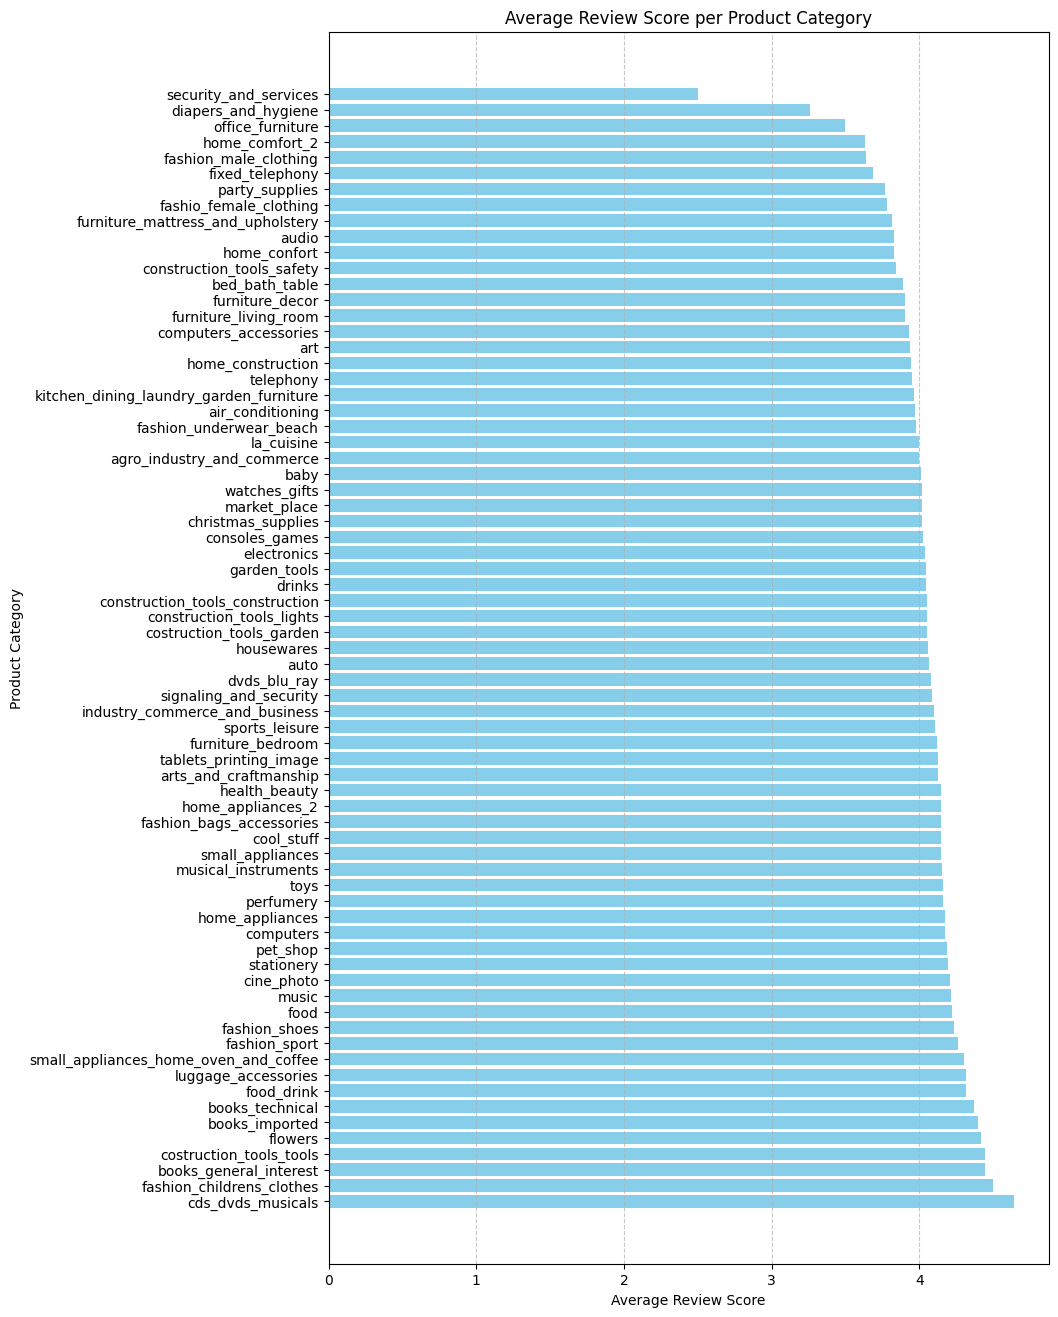

In [71]:
# visualisasi rata-rata ulasan per kategori produk

plt.figure(figsize=(12, 16))
plt.barh(avg_review_score_per_category.index, avg_review_score_per_category.values, color='skyblue')
plt.xlabel('Average Review Score')
plt.ylabel('Product Category')
plt.title('Average Review Score per Product Category')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.yticks(rotation=0, ha='right')
plt.subplots_adjust(left=0.3, right=0.9)
plt.show()

Kategori produk "cds_dvds_musicals" memiliki rata-rata ulasan tertinggi, menunjukkan bahwa pelanggan merasa puas dengan produk di kategori ini. Sebaliknya, kategori "security_and_services" memiliki rata-rata ulasan yang lebih rendah, menunjukkan potensi masalah atau tidak sesuai ekspetasi pelanggan.

In [72]:
# membuat pivot table untuk menghitung distribusi review score per kategori produk
review_distribution = merged_df.pivot_table(index='product_category_name_english',
                                            columns='review_score',
                                            aggfunc='size',
                                            fill_value=0).reset_index()

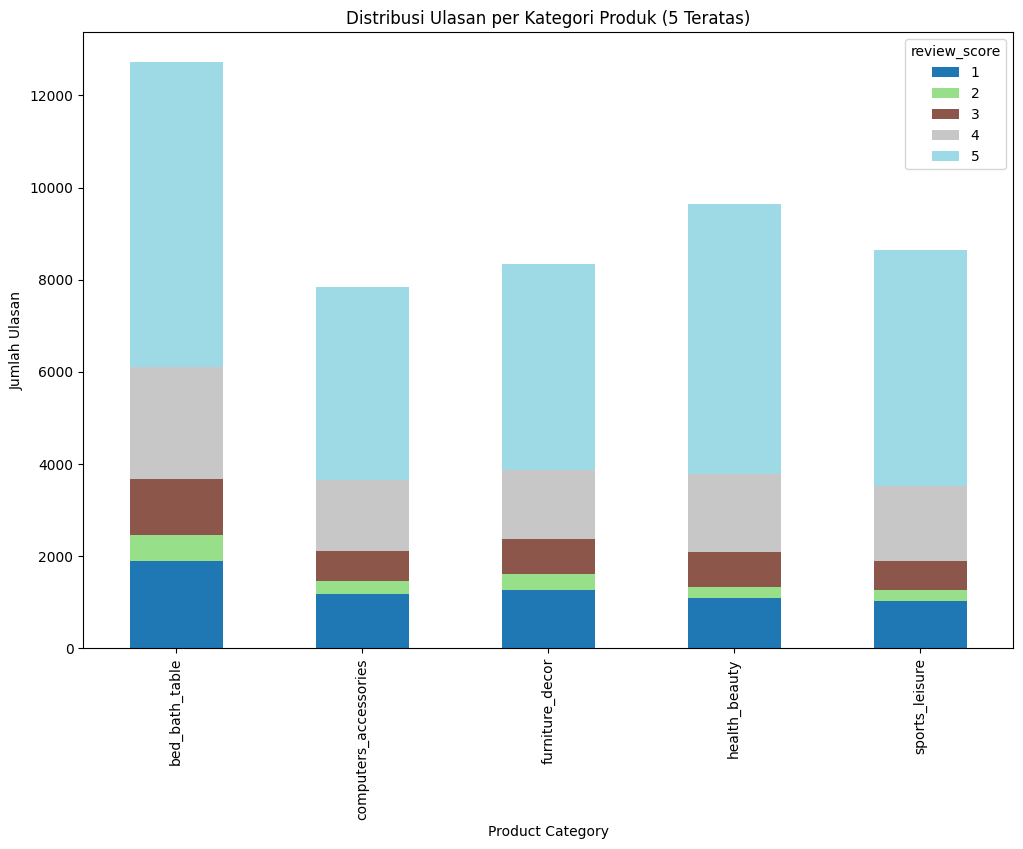

In [73]:
# mengambil 5 kategori teratas berrdasarkan jumlah ulasan total
top_5_reviews = review_distribution.set_index('product_category_name_english').sum(axis=1).sort_values(ascending=False).head(5)

# mengambil distribusi ulasan dari kategori teratas
top_5_review_distribution = review_distribution[review_distribution['product_category_name_english'].isin(top_5_reviews.index)]

# visualisasi untuk 5 kategori teratas
top_5_review_distribution.set_index('product_category_name_english').plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Distribusi Ulasan per Kategori Produk (5 Teratas)')
plt.xlabel('Product Category')
plt.ylabel('Jumlah Ulasan')
plt.show()

Kategori dengan ulasan tertinggi menunjukkan produk populer yang memiliki kualitas baik dan minat yang tinggi dari pelanggan. Strategi promosi dan upaya mempertahankan kualitas produk dapat lebih difokuskan pada kategori ini.

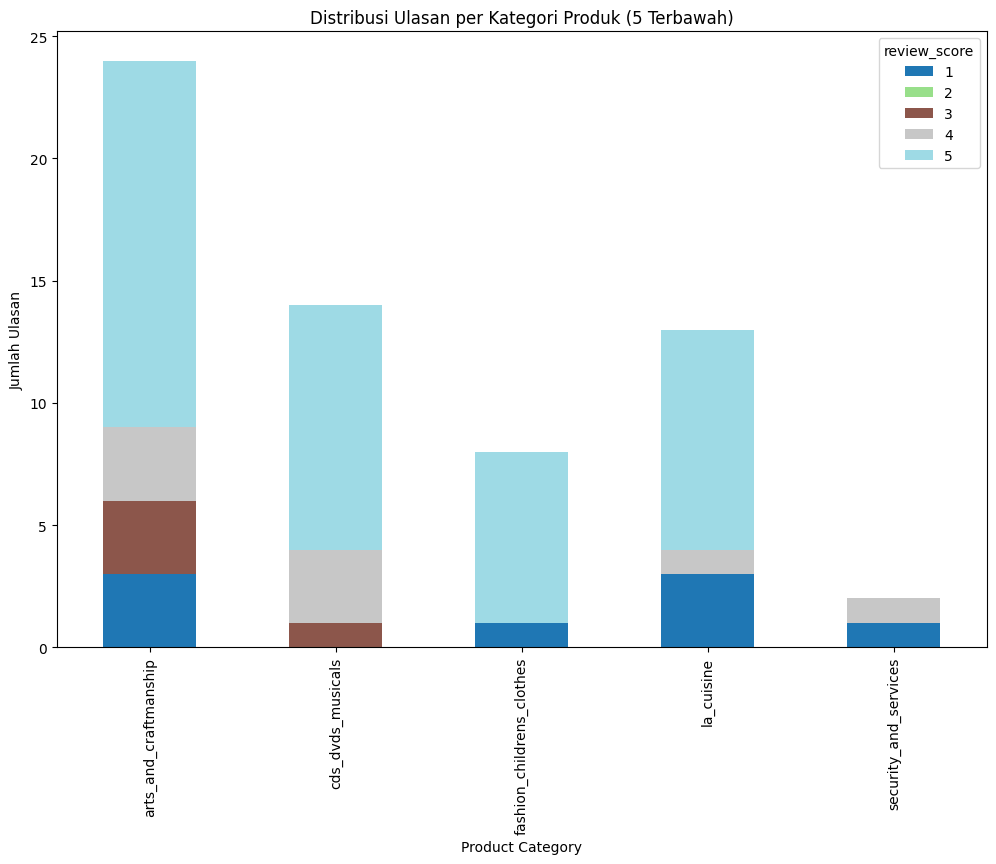

In [74]:
# mengambil 5 kategori terbawah berrdasarkan jumlah ulasan total
bottom_5_reviews = review_distribution.set_index('product_category_name_english').sum(axis=1).sort_values(ascending=False).tail(5)

# mengambil distribusi ulasan dari kategori terbawah
bottom_5_review_distribution = review_distribution[review_distribution['product_category_name_english'].isin(bottom_5_reviews.index)]

# visualisasi untuk 5 kategori terbawah
bottom_5_review_distribution.set_index('product_category_name_english').plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Distribusi Ulasan per Kategori Produk (5 Terbawah)')
plt.xlabel('Product Category')
plt.ylabel('Jumlah Ulasan')
plt.show()

Kategori dengan ulasan terendah bisa menunjukkan kurangnya popularitas atau masalah kualitas, dan perlu dilakukan evaluasi ulang terhadap produk-produk di kategori tersebut untuk meningkatkan daya tarik dan kepuasan pelanggan.

### Pertanyaan 2: Berapa rata-rata waktu pengiriman hingga sampai ke pelanggan?

Langkah explanatory analysis dan visualisasi:
1. Menyampaikan insight yang didapat dari exploratory data
2. Menggunakan bar chart untuk menunjukkan rata-rata waktu pengiriman hingga sampai ke pelanggan?

In [75]:
# menghitung rata-rata waktu pengiriman setelah pembersihan data tidak masuk akal

average_delivery_time = orders_df['delivery_time_days'].mean()
print(f"Rata-rata waktu pengiriman: {average_delivery_time:.2f} hari")

Rata-rata waktu pengiriman: 12.23 hari


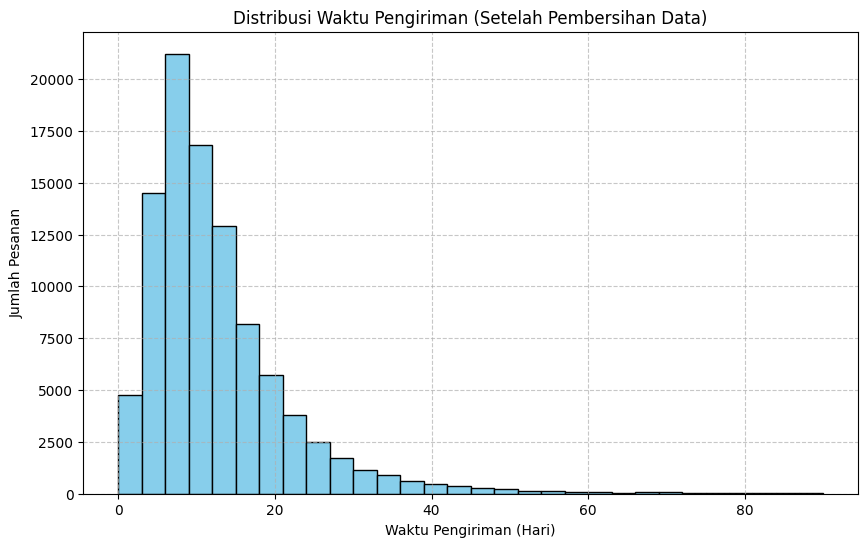

In [76]:
# visualisasi distribusi waktu pengiriman

plt.figure(figsize=(10, 6))
plt.hist(orders_df['delivery_time_days'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Waktu Pengiriman (Setelah Pembersihan Data)')
plt.xlabel('Waktu Pengiriman (Hari)')
plt.ylabel('Jumlah Pesanan')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [77]:
# menghitung rata-rata waktu estimasi pengiriman

orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])
orders_df['estimated_delivery_days'] = (orders_df['order_estimated_delivery_date'] - orders_df['order_purchase_timestamp']).dt.days
average_estimated_delivery_time = orders_df['estimated_delivery_days'].mean()
print(f"Rata-rata waktu estimasi pengiriman: {average_estimated_delivery_time:.2f} hari")

Rata-rata waktu estimasi pengiriman: 23.38 hari


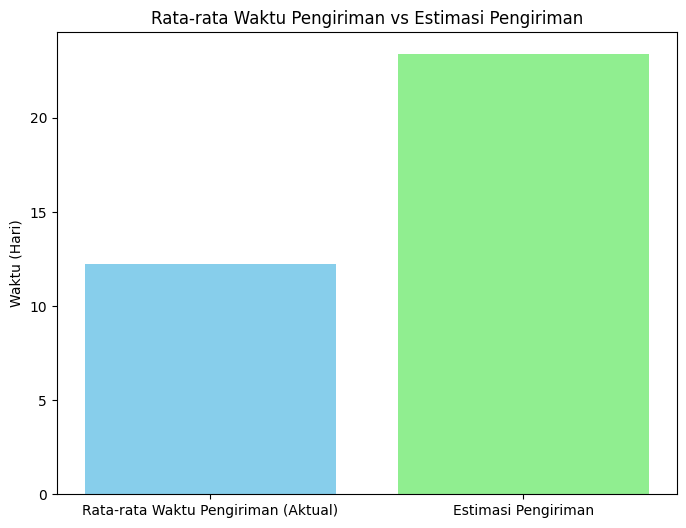

In [78]:
# visualisasi perbandingan rata-rata waktu pengiriman dan estimasi

plt.figure(figsize=(8, 6))
plt.bar(['Rata-rata Waktu Pengiriman (Aktual)', 'Estimasi Pengiriman'],
        [average_delivery_time, average_estimated_delivery_time], color=['skyblue', 'lightgreen'])
plt.title('Rata-rata Waktu Pengiriman vs Estimasi Pengiriman')
plt.ylabel('Waktu (Hari)')
plt.show()

Berdasarkan visualisasi data yang ditampilkan rata-rata waktu pengiriman aktual memiliki kecepatan dibandingkan dengan estimasi.

### Pertanyaan 3: Siapa pelanggan yang paling aktif dalam memberikan nilai?

Langkah explanatory analysis dan visualisasi:
1. Menyampaikan insight yang didapat dari exploratory data
2. Menggunakan bar chart untuk menunjukkan siapa pelanggan yang paling aktif memebrikan nilai

In [79]:
# menampilkan pelanggan yang paling aktif dengan jumlah ulasan terbanyak
most_active_customers = customer_review_count.head(10)
most_active_customers

,review_id
customer_id,
9e29cde4ddb42f9330bcf3c9bc23d177,3
ae0fb7b01c548c4fd30f19f55453ec4a,3
b7770073b02ed1d626a027ce86a4ff82,3
2a35ad9f439dfc62d35a0202e71d6c66,3
82c4ae9f59304faecc7ea3ef42b253f4,2
26fdb52d0382ebe750a8866b5bf9e5db,2
4740044a9390cc45b2c213e8714129e7,2
5a1739996fb7a15067fa38c3a0a1097e,2
c93ebba7ff597e5be398633ecd66561f,2


Berdasrkan hasil data yang ditampilkan terdapat 4 pelanggan yang memberikan ulasan sebanyak 3 kali ulasan dengan id:
1. 9e29cde4ddb42f9330bcf3c9bc23d177
2. ae0fb7b01c548c4fd30f19f55453ec4a
3. b7770073b02ed1d626a027ce86a4ff82
4. 2a35ad9f439dfc62d35a0202e71d6c6

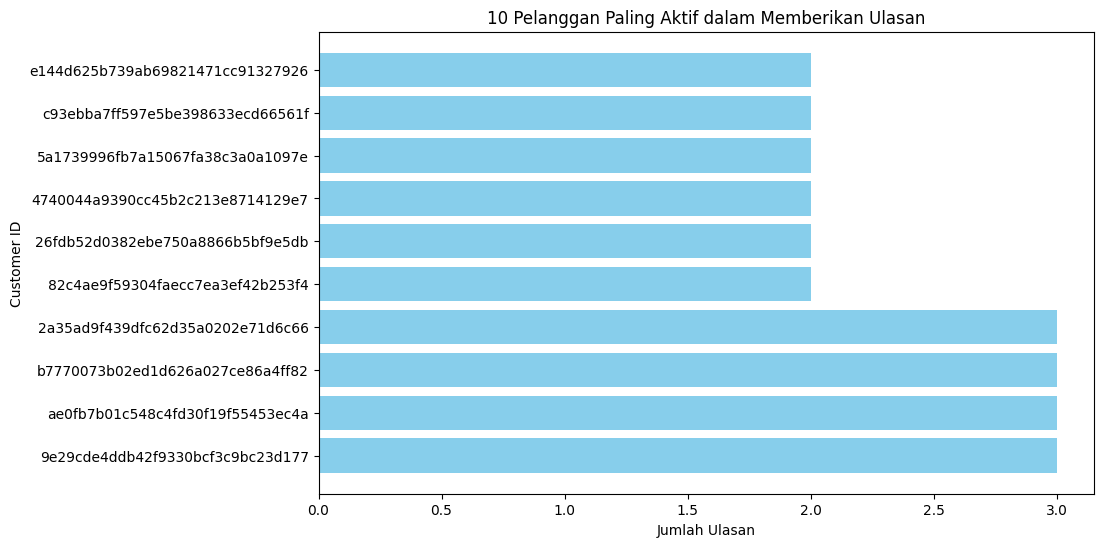

In [80]:
# visualisasi bar chart untuk 10 pelanggan aktif
plt.figure(figsize=(10, 6))
plt.barh(most_active_customers.index, most_active_customers.values, color='skyblue')
plt.xlabel('Jumlah Ulasan')
plt.ylabel('Customer ID')
plt.title('10 Pelanggan Paling Aktif dalam Memberikan Ulasan')
plt.show()

## Analisis Lanjutan RFM

RFM analysis merupakan salah satu metode yang umum digunakan untuk melakukan segmentasi pelanggan (mengelompokkan pelanggan ke dalam beberapa kategori) berdasarkan tiga parameter, yaitu recency, frequency, dan monetary.

1. Recency: parameter yang digunakan untuk melihat kapan terakhir seorang
pelanggan melakukan transaksi.
2. Frequency: parameter ini digunakan untuk mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi.
3. Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut.

In [81]:
# membuat dataframe RFM untuk menampung informasi Recency, Frequency, dan Monetary
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max",  # mengambil tanggal order terakhir (Recency)
    "order_id": "nunique",              # menghitung jumlah order unik (Frequency)
    "payment_value": "sum"              # menghitung total revenue yang dihasilkan (Monetary)
})

# mengubah nama kolom agar lebih jelas sesuai dengan RFM analysis
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung Recency (selisih hari dari transaksi terakhir hingga hari ini)
recent_date = all_df['order_purchase_timestamp'].max()
rfm_df['recency'] = (recent_date - pd.to_datetime(rfm_df['max_order_timestamp'])).dt.days
rfm_df['recency'] = rfm_df['recency'].astype(int)

# menghapus kolom max_order_timestamp yang tidak diperlukan
rfm_df.drop(columns=["max_order_timestamp"], inplace=True)

# menampilkan dataframe RFM
rfm_df.head()


,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,287
1,000161a058600d5901f007fab4c27140,1,67.41,409
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,547
3,0002414f95344307404f0ace7a26f1d5,1,179.35,378
4,000379cdec625522490c315e70c7a9fb,1,107.01,149


<ipython-input-82-294ca5db8039>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="short_customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist

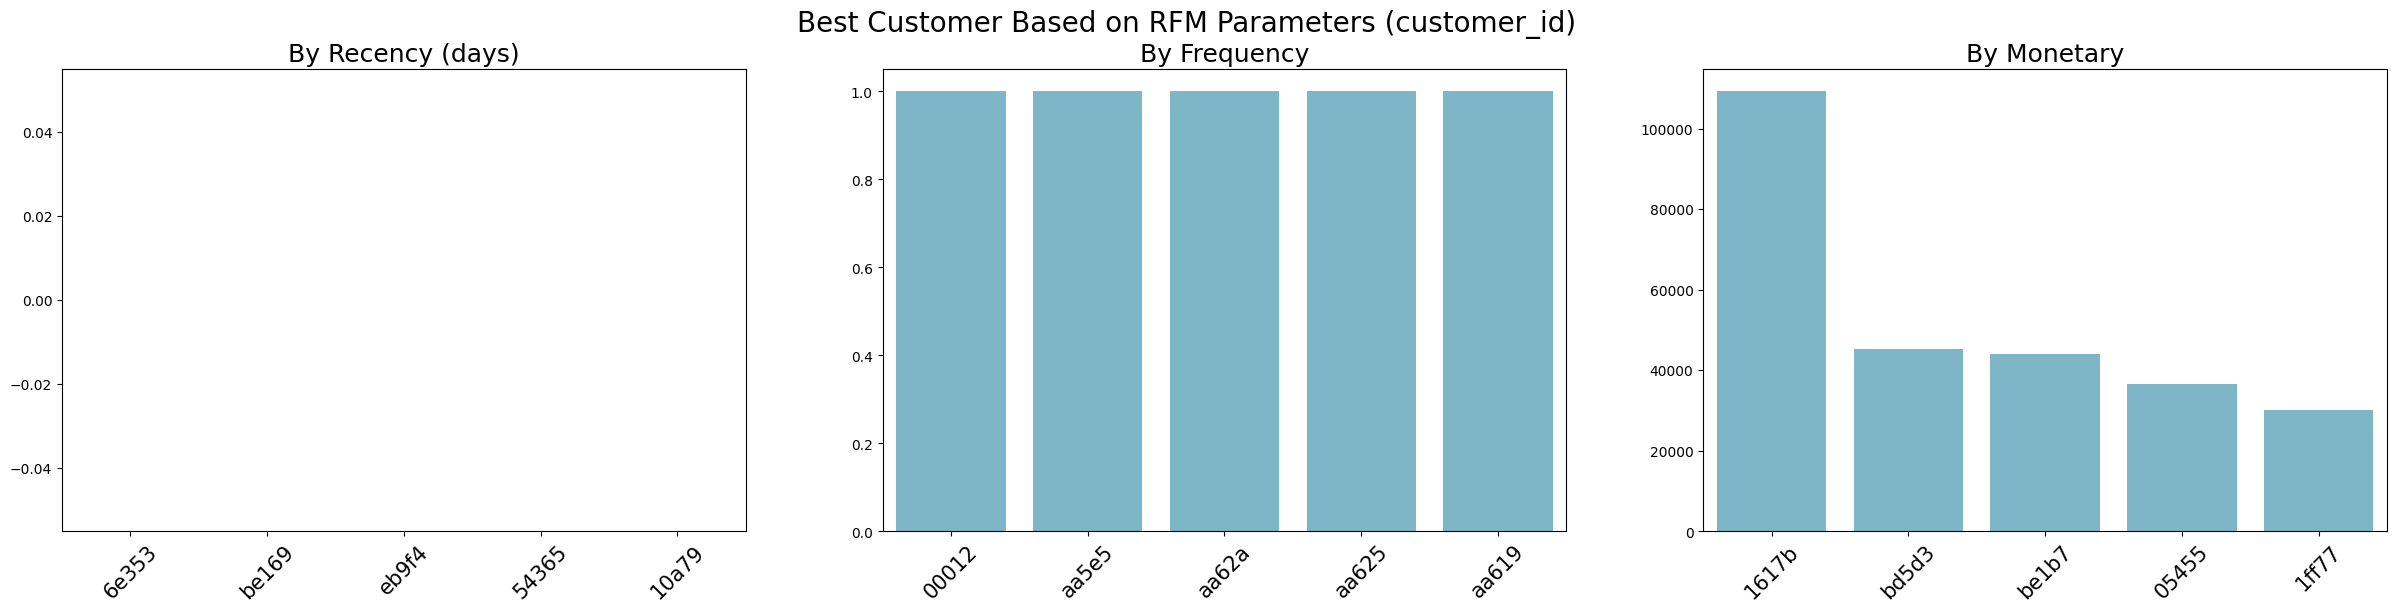

In [82]:
# mengambil 5 karakter pertama dari customer_id agar lebih rapi
rfm_df['short_customer_id'] = rfm_df['customer_id'].apply(lambda x: x[:5])

# visualisasi dengan label customer_id yang dipersingkat
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# bar plot for Recency
sns.barplot(y="recency", x="short_customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15, rotation=45)

# bar plot for Frequency
sns.barplot(y="frequency", x="short_customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, rotation=45)

# bar plot for Monetary
sns.barplot(y="monetary", x="short_customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, rotation=45)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()


## Conclusion

### Conclusion pertanyaan 1

Kategori produk "cds_dvds_musicals" memiliki rata-rata ulasan tertinggi, menunjukkan bahwa pelanggan merasa puas dengan produk di kategori ini. Sebaliknya, kategori "security_and_services" memiliki rata-rata ulasan yang lebih rendah, menunjukkan potensi masalah atau tidak sesuai ekspetasi pelanggan.

Kategori dengan ulasan tertinggi yakni "bed_bath_table" menunjukkan produk populer yang memiliki kualitas baik dan minat yang tinggi dari pelanggan. Strategi promosi dan upaya mempertahankan kualitas produk dapat lebih difokuskan pada kategori ini.

Kategori dengan ulasan terendah yakni "security_and_services" menunjukkan kurangnya popularitas atau masalah kualitas, dan perlu dilakukan evaluasi ulang terhadap produk-produk di kategori tersebut untuk meningkatkan daya tarik dan kepuasan pelanggan.

### Conclusion pertanyaan 2

Rata-rata waktu estimasi pengiriman adalah 23 hari. Selain itu jika membadningkan dengan waktu pengiriman aktual yakni Rata-rata waktu pengiriman 12 hari. Hal ini seharusnya berdampak baik karena barang lebih cepat diterima lebih awal dibandingkan dengan estiamsi, sehingga tidak mengeceawak pelanggan.

### Conclusion pertanyaan 3

Berdasrkan hasil data yang ditampilkan terdapat 4 pelanggan yang memberikan ulasan sebanyak 3 kali ulasan dengan id:
1. 9e29cde4ddb42f9330bcf3c9bc23d177
2. ae0fb7b01c548c4fd30f19f55453ec4a
3. b7770073b02ed1d626a027ce86a4ff82
4. 2a35ad9f439dfc62d35a0202e71d6c6

### Analisis RFM

- Insight Recency:
Grafik *Recency* tidak menampilkan hasil yang diharapkan, mungkin ada masalah pada data atau filter yang digunakan. Nilai *Recency* seharusnya mencerminkan jumlah hari sejak transaksi terakhir yang dilakukan oleh pelanggan. Jika nilainya terlihat sangat kecil atau bahkan negatif, kemungkinan ada kesalahan dalam perhitungan tanggal atau selisih hari.

- Insight Frequency:
Grafik *Frequency* menunjukkan pelanggan yang paling sering melakukan transaksi. Pelanggan dengan ID yang diawali '00012' adalah yang paling sering bertransaksi, diikuti oleh beberapa pelanggan lain dengan frekuensi transaksi yang hampir sama. Hal ini menunjukkan bahwa ada beberapa pelanggan dengan aktivitas pembelian yang sangat sering, yang mengindikasikan mereka mungkin sangat loyal dan memiliki potensi untuk menjadi pelanggan penting bagi bisnis.

- insight Monetary:
Pelanggan dengan ID yang diawali '1617b' adalah yang paling banyak mengeluarkan uang, dengan selisih yang cukup besar dibandingkan pelanggan lainnya. Nilai *Monetary* untuk pelanggan ini jauh lebih tinggi, menunjukkan bahwa mereka adalah pelanggan dengan kontribusi finansial yang signifikan dan berpotensi menjadi pelanggan yang sangat berharga bagi bisnis.


# All_Df

In [83]:
# menyimpan berkas yang telah dibersihkan
from google.colab import files
all_df.to_csv("all_data.csv", index=False)
files.download("all_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>